# Projeto Sprint 9
## Primeira Parte:
* A primeira parte do projeto consiste em analisar as hipóteses que foram formuladas com a finalidade de aumentar a receita da empresa.
* Nessa primeira parte vamos analisar as hipóteses e aplicar os frameworks ICE e RICE para sabermos quais hipóteses serão priorizadas.


In [1]:
# Importando as bibliotecas que vão ser usadas nesse projeto
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st
import math as mth
import matplotlib.pyplot as plt

In [2]:
# Lendo o arquivo com os dados das hipóteses
df_hypho= pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
df_hypho

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
# Chamando o método info() para conferir o tipo de dados do df.
# Tudo certo com os tipos de cada dado. 
df_hypho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# Colocando as colunas do df_hypo em letras minúsculas conforme snake_case pede.
new_col_names= []
for old_name in df_hypho.columns:
    name_lowered= old_name.lower()
    new_col_names.append(name_lowered)
df_hypho.columns= new_col_names

In [5]:
df_hypho.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [6]:
# Aplicando o ICE para avaliarmos quais hipóteses priorizar
df_hypho['ice']= (df_hypho['impact'] * df_hypho['confidence']) / df_hypho['effort']
df_hypho['ice'] = df_hypho['ice'].round(2)
print(df_hypho[['hypothesis','ice']].sort_values(by= 'ice', ascending= False))

                                          hypothesis    ice
8  Launch a promotion that gives users discounts ...  16.20
0  Add two new channels for attracting traffic. T...  13.33
7  Add a subscription form to all the main pages....  11.20
6  Show banners with current offers and sales on ...   8.00
2  Add product recommendation blocks to the store...   7.00
1  Launch your own delivery service. This will sh...   2.00
5  Add a customer review page. This will increase...   1.33
3  Change the category structure. This will incre...   1.12
4  Change the background color on the main page. ...   1.00


* Com base no teste ICE a melhor hipótese para priorizarmos seria a 8, visto que é a que apresenta a melhor relação entre um impacto potencialmente alto, alta confiança e um esforço potencialmente baixo.

In [7]:
# Aplicando o teste RICE para avaliarmos qual hipótese devemos priorizar.
df_hypho['rice']= (df_hypho['reach'] * df_hypho['impact'] * df_hypho['confidence']) / df_hypho['effort']
df_hypho['rice']= df_hypho['rice'].round(2)
print(df_hypho[['hypothesis','rice']].sort_values(by= 'rice', ascending= False))

                                          hypothesis   rice
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


* Com base no teste RICE a melhor hipótese seria a 7. 
* Como a hipótese 7 foi a primeira no teste RICE e a terceira no teste ICE, ela seria uma boa opção para ser priorizada.
* Os valores dos testes variam em relação a cada hipótese porque cada hipótese tem suas particularidades, como a 7 hipótese tem um grande alcance(reacch) ela assumiu a liderança do teste RICE.
* Cada parâmetro deve ser analisado com cuidado, mas aplicar esses dois testes pode ser um direcionamento de qual hipótese priorizar.
* A hipótese 0tem valores parecidos com a 7, contudo, a grande diferença está no alcance, sendo assim, já que teremos quase os mesmos impactos, confiança e esforço, seria melhor priorizar uma hipótese que terá mais alcance.

# Segunda Parte do Projeto
* Após ser realizado o teste A/B vamos analisar os resultados.
* Vamos pré-processar os dados de cada data frame.
* Cada célula irá conter uma linha explicando o que será realizado. 

In [8]:
# Fazendo a leitura de cada arquivo csv e armazenando no seu data frame correspondente.
df_orders= pd.read_csv('/datasets/orders_us.csv')
df_visits= pd.read_csv('/datasets/visits_us.csv')

In [9]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [11]:
# Vamos transformar a coluna date que está com o tipo object no tipo datetime.
df_orders['date']= pd.to_datetime(df_orders['date'], format= '%Y-%m-%d') 

<div class="alert alert-block alert-success">
<b>Comentário do revisor</b> <a class="tocSkip"></a>
Ter que converter os tipos de dados é muito comum, é sempre importante estar atento.
</div>

In [12]:
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
# Aqui também vamos transformar a coluna date que está com o tipo object no tipo datetime.
df_visits['date']= pd.to_datetime(df_visits['date'], format= '%Y-%m-%d') 


* Os valores de data foram convertidos para o tipo certo e não tem valores ausentes em nenhums dos dois data frames.

In [15]:
# Verificando se há visitantes que estão nos dois grupos A e B.
# Depois disso usamos intersection para unir os visitantes em comum nos dois grupos.
visitors_group_A = set(df_orders[df_orders['group'] == 'A']['visitorId'])
visitors_group_B = set(df_orders[df_orders['group'] == 'B']['visitorId'])

common_visitors = visitors_group_A.intersection(visitors_group_B)

# Aqui fizemos uma condição, onde faz a contagem de valores em common_visitors e nos mostra quantos visitantes tem em comum 
if len(common_visitors) > 0:
    print(f"Existem {len(common_visitors)} visitantes que estão nos grupos A e B.")
else:
    print("Não foram encontrados visitantes comuns nos grupos A e B.")


Existem 58 visitantes que estão nos grupos A e B.


In [16]:
# Nesta célula filtramos o df_orders para nos dar as linhas que não contêm os valores em comum dos grupos A e B, dessa forma,
# podemos seguir com a análise.
df_orders_filtered = df_orders[~df_orders['visitorId'].isin(common_visitors)]
print(df_orders_filtered.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
5      182168103   935554773 2019-08-15     35.0     B


In [17]:
df_orders_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [18]:
df_orders.duplicated().sum()

0

In [19]:
# construindo um vetor com valores de pares unívocos de grupos de datas
datesGroups = df_orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [20]:
# Obtendo dados diários cumulativos agregados sobre pedidos
ordersAggregated = (datesGroups.apply(lambda x: df_orders_filtered[np.logical_and(df_orders_filtered['date'] <= x['date'], df_orders_filtered['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}),
axis=1).sort_values(by=['date','group']))
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [21]:
# Obtendo dados diários cumulativos agregados sobre visitantes  
visitorsAggregated = (datesGroups.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], df_visits['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max','visits' : 'sum'}), axis=1).sort_values(by=['date','group']))
visitorsAggregated.head()


,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [23]:
# Agora fiz a mesclagem dos dois data frames com os dados acumulados por grupo e por dia.
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'n_transactions', 'n_buyers', 'revenue','visits']
cumulativeData.head()

,date,group,n_transactions,n_buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [24]:
# Usando dados SEM FILTRAGEM de usuários repetidos
# Obtendo dados diários cumulativos agregados sobre pedidos
ordersAggregated_brut = (datesGroups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}),
axis=1).sort_values(by=['date','group']))
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [25]:
# CONTINUANDOO SEM FILTRAGEM
# Agora fiz a mesclagem dos dois data frames com os dados acumulados por grupo e por dia.
cumulativeData_brut = ordersAggregated_brut.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_brut.columns = ['date', 'group', 'n_transactions', 'n_buyers', 'revenue','visits']
cumulativeData_brut.head()

,date,group,n_transactions,n_buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [29]:
# Construindo data frames com os DADOS BRUTOS contendo a receita acumulada por dia e por grupo
cumulativeRevenueA_brut= cumulativeData_brut[cumulativeData_brut['group']=='A'][['date','revenue','n_transactions','n_buyers']]
cumulativeRevenueB_brut= cumulativeData_brut[cumulativeData_brut['group']=='B'][['date','revenue','n_transactions','n_buyers']]
cumulativeRevenueA_brut.head()

,date,revenue,n_transactions,n_buyers
0,2019-08-01,2356.8,24,20
2,2019-08-02,3860.3,44,38
4,2019-08-03,5675.5,68,62
6,2019-08-04,6822.1,84,77
8,2019-08-05,8810.2,109,100


In [31]:
cumulativeData_brut.nunique()

date              31
group              2
n_transactions    62
n_buyers          60
revenue           62
visits            62
dtype: int64

In [32]:
cumulativeData.nunique()

date              31
group              2
n_transactions    61
n_buyers          59
revenue           62
visits            62
dtype: int64

In [33]:
df_orders.nunique()

transactionId    1197
visitorId        1031
date               31
revenue           403
group               2
dtype: int64

In [35]:
df_orders_filtered.nunique()

transactionId    1016
visitorId         973
date               31
revenue           359
group               2
dtype: int64

In [28]:
# Construindo data frames com a receita acumulada por dia e por grupo
cumulativeRevenueA= cumulativeData[cumulativeData['group']=='A'][['date','revenue','n_transactions','n_buyers']]
cumulativeRevenueB= cumulativeData[cumulativeData['group']=='B'][['date','revenue','n_transactions','n_buyers']]
cumulativeRevenueA.head()

,date,revenue,n_transactions,n_buyers
0,2019-08-01,2266.6,23,19
2,2019-08-02,3734.9,42,36
4,2019-08-03,5550.1,66,60
6,2019-08-04,6225.6,77,71
8,2019-08-05,7623.6,99,92


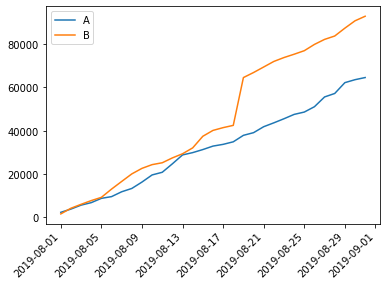

In [30]:
# Criando o gráfico de receita cumulativa para o grupo A e B usando os DADOS BRUTOS
plt.plot(cumulativeRevenueA_brut['date'], cumulativeRevenueA_brut['revenue'], label='A')
plt.plot(cumulativeRevenueB_brut['date'], cumulativeRevenueB_brut['revenue'], label='B')

# Definindo manualmente o espaçamento e a rotação dos rótulos das datas no eixo x
plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos em 45 graus e alinhando à direita


plt.legend()
plt.show()


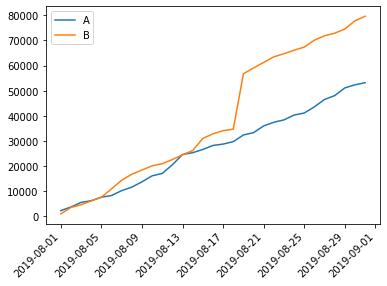

In [69]:
# Criando o gráfico de receita cumulativa para o grupo A e B
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Definindo manualmente o espaçamento e a rotação dos rótulos das datas no eixo x
plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos em 45 graus e alinhando à direita


plt.legend()
plt.show()


* O gráfico acima mostra a receita acumulada diária de cada grupo, o grupo B apresentou picos de receita, o que pode sugerir pedidos muito grandes ou muitos pedidos naquele dia. 

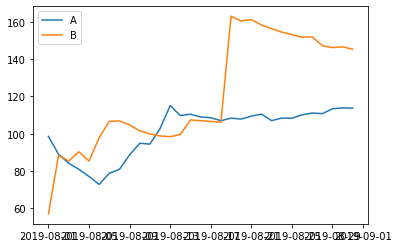

In [70]:
# Construindo um gráfico com o volume médio de compra para cada grupo.
# Para isso dividi a receita pela quantidade de pedidos por grupo.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['n_transactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['n_transactions'], label='B')
plt.legend()

* O volume médio de pedidos para o grupo A se estabiliza ao final do teste.
* Para o grupo B é diferente, temos um pico no meio do teste, isso pode indicar um grande aumento no volume dos pedidos. 

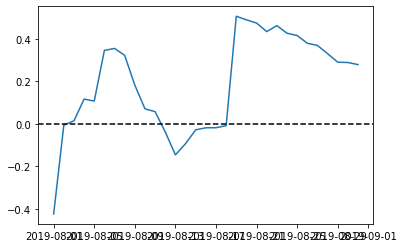

In [71]:
# Construindo um gráfico de diferença relativa no tamanho médio acumulado de pedidos para o grupo B em relação com o grupo A.
# Mesclando os dados em um df somente. 
mergedCumulativeRevenue= cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['n_transactionsB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['n_transactionsA'])-1)

# acrescentando o eixo X para comparação.
plt.axhline(y=0, color='black', linestyle='--')

* Em vários pontos, a diferença relativa entre os grupos apresenta picos, isso pode indicar a ocorrência de valores atípicos e pedidos grandes. Provavelmente teremos que fazer uma análise desses números atípicos.

In [72]:
#Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. 
#Trace as taxas de conversão diárias dos dois grupos e descreva a diferença. Tire conclusões e crie conjecturas.
cumulativeData.head()

,date,group,n_transactions,n_buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [73]:
# Descobrindo as datas mínimas e máximas para criar calcular as taxas de conversão diária pra cada grupo
date_min = cumulativeData['date'].min()
date_max = cumulativeData['date'].max()
print("Data mínima:", date_min)
print("Data máxima:", date_max)

Data mínima: 2019-08-01 00:00:00
Data máxima: 2019-08-31 00:00:00


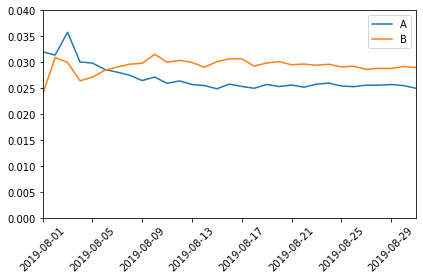

In [74]:
# Calculando as taxas de conversão de cada grupo por dia.
# calculando a conversão cumulativa
cumulativeData['conversion'] = cumulativeData['n_transactions']/cumulativeData['visits']

# selecionando dados no grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Selecionando dados no grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# construindo os gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# Definindo a escala dos eixos
plt.xticks(rotation=45)  # Rotacionamdo os rótulos do eixo x para melhor visualização
plt.ylim(0, 0.04)  # Definindo a escala do eixo y
plt.xlim(pd.Timestamp('2019-08-01'), pd.Timestamp('2019-08-31'))
plt.tight_layout()  # Ajustando o layout do gráfico para evitar sobreposição de elementos
plt.show()

* A conversão diária do grupo A começou maior, depois caiu e se estabilizou.
* Os picos de conversão tem um tipo de simetria entre as duas linhas. 

No handles with labels found to put in legend.


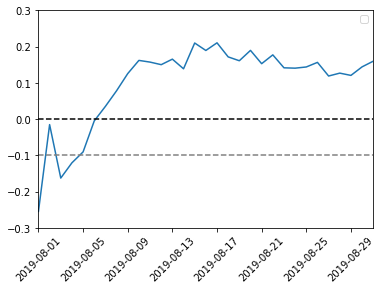

In [75]:
# Fazendo um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A. 

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=45)

# Definindo a escala dos eixos
plt.xlim(pd.Timestamp('2019-08-01'), pd.Timestamp('2019-08-31'))
plt.ylim(-0.3, 0.3)

plt.show()

* No começo do teste o grupo B estava para trás, mas depois ele assumiu a liderança na diferença relativa entre taxas de conversão cumulativa dos grupos. 
* Essa repentina subida pode indicar valores atípicos no grupo B.


### Nesta parte do Projeto vamos analisar os valores atípicos e como eles influem no teste.

In [76]:
# Descobrindo a quantidade de pedidos por usuário
ordersByUsers = (df_orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False)
                 .agg({'transactionId': pd.Series.nunique}).sort_values(by='transactionId', ascending= False))
ordersByUsers.head()

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


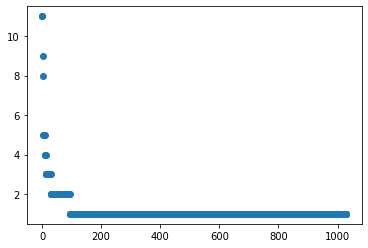

In [77]:
# Construindo um gráfico de dispersão com a quantidade de pedidos por usuário.
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactionId'])

* Realmente podemos notar que existe uma discrepância de valoes no número de pedidos por usuário.

In [78]:
# Calculando os percentis 95 e 99 para a quantidade de pedidos por usuário.
print(np.percentile(ordersByUsers['transactionId'], [95, 99]))

[2. 4.]


* Com os percentis podemos notar que apenas 5% dos usuários fizeram acima de 2 pedidos, e somente 1% fizereram acima de 4 pedidos, ou seja, acima de 2 pedidos por usuário, pode ser considerado uma anomalia. 

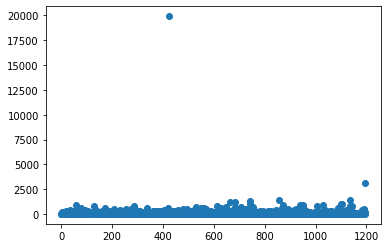

In [79]:
# Fazendo um gráfico de dispersão dos preços dos pedidos.
x_values= pd.Series(range(0, len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])


In [80]:
# Calculando os percentis 95 e 99 dos preços dos pedidos.
print(np.percentile(df_orders['revenue'], [95, 99]))

[435.54  900.904]


* Calculando os percentis para os preços dos pedidos, notamos que menos que 5% dos pedidos são maiores que 435.54. 
* Notamos também que somente 1% dos pedidos são acima de 900.905. 
* Podemos considerar uma anomalia qualquer pedido que tenha uma receita maior do que 435.54.

In [81]:
#Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. 
# Criando dois data frames com a quantidade de pedidos por usuário e por grupo.
ordersByUsersA = df_orders[df_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = df_orders[df_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [82]:
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


<div class="alert alert-block alert-success">
<b>Comentário do revisor</b> <a class="tocSkip"></a>

A análise dos gráficos e dos resultados mostra um domínio excelente!
</div>

In [83]:
# Nesta célula foi extraído os usuários de grupos diferentes e quantidades de pedidos correspondentes.
# Também foi calculado os usuários que não fizeram nenhum pedido, e depois concatenamos essa sequência. 
sampleA = (pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum()
                                                - len(ordersByUsersA['orders'])), name='orders')],axis=0))
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [84]:
# Para o grupo B foi feito o mesmo processo de extração do grupo A.
sampleB = (pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum()
                                                        - len(ordersByUsersB['orders'])), name='orders')],axis=0))
sampleB.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

* Sabemos sampleA armazena uma amostra em que cada elemento é a quantidade de pedidos realizada por um usuário específico, incluindo os zeros. Então a quantidade de elementos sampleA é a quantidade de usuários, e a soma de todos elementos é a quantidade de pedidos. Para obter a taxa de conversão do grupo, vamos precisar dividir a soma dos pedidos pela quantidade de pedidos. Usando o método mean() vamos descobrir a média para sampleA. Vamos descobrir a taxa de conversão para o grupo B de modo similar: sampleB.mean().

In [85]:
# Aplicando o teste mannwhitneyu nas distribuições da conversão dos usuários contidos em 
# sampleA e sampleB, um dos motivos para a escolha desse teste é que ele não
# exige dados paramétricos e nem distribuição normal.
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))


0.017


* O resultado do teste mostra que existe significância estatística entre as duas amostras que contêm os dados de conversão, visto que, o valor foi de aproximadamente 2%, desse modo, concluímos que existe diferença estatística na conversão dos dois grupos. 

In [86]:
# Para calcular a significância estatística da diferença do volume médio dos pedidos, será passado os dados sobre a receita para
# o teste mannwhitneyu
print('{0:.3f}'.format(st.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))

0.692


* O resultado do teste mannwhitneyu para a significância da diferença entre os volumes de receita dos pedidos mostrou que não existe diferença sifnificativa entre os volumes da receita, ja que o valor -p foi de aproximadamente 70%.
* Esse resultado indica que não tem diferença significativa entre os volumes médios das receitas dos dois grupos. 

In [88]:
# Usando o 95 e 99 percentis de quantidade de pedidos por usuário e volume médio de preço de pedidos vamos filtrar os dados.
# 95 e 99 percentis para a quantidade de pedidos por usuário. [2. 4.]
# Percentis 95 e 99 dos preços dos pedidos. [435.54  900.904]
# Vamos extrair os usuários com mais de 2 pedidos.
usersWithManyOrders = (pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], 
                                  ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0))
usersWithManyOrders.head()

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
Name: userId, dtype: int64

In [89]:
#Nesta célula pegamos os usuários com receitas maiores do que 435.54.
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 435.54]['visitorId']

In [90]:
# Aqui vamos concatenar todos os usuários considerados anômalos.
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
# Usando o método shape para descobrir a quantidade total de usuários anômalos. 
print(abnormalUsers.shape)
# Descobrimos que temos 20 usuários anômalos.

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


In [91]:
# Agora para saber se suas ações afetaram os resultados dos testes, vamos calcular a significância estatística das diferenças
# na conversão entre os grupos usando os dados filtrados. 
# Aqui o método isin está retirando os usuários anômalos do data frame ordersByUsersA.
# O mesmo está sendo feito para o B.
sampleAFiltered = (pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                              pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum()
                            - len(ordersByUsersA['orders'])),name='orders')],axis=0))

sampleBFiltered = (pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                              pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() 
                                                           - len(ordersByUsersB['orders'])),name='orders')],axis=0))


In [92]:
# Aplicando o critério estatístico Mann-Whitney às amostras resultantes:
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

0.013


* Notamos que a significância estatística entre a conversão não mudou tanta coisa, visto que, o valor encontrado com os dados brutos foi de 0.017. 

In [93]:
# Usando o mesmo raciocínio para descobrir se existe significância estatística entre os dados de volue médio de pedidos. 

print('{0:.3f}'.format(st.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

0.788


* O resultado do teste diz que não existe significância estatística para os dados de receita sem os usuários anômalos.
* O resultado dos dados filtrados foi muito parecido com o resultado dos dados brutos. 

### Conclusão:
* O gráfico de diferença relativa na conversão cumulativa evidencia que o grupo B tem resultados melhores do que os do grupo A.
* Tanto nos dados brutos, quanto nos dados filtrados, existe diferença estatística significativa na conversão dos dois grupos. 
* Os dados brutos não apresentaram uma diferença estatística significativa entre os grupos, em termos de volume médio de compra.
